In [2]:
import pandas as pd
import random
import numpy as np
import faker as Faker
from faker import Faker
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
rcParams['figure.figsize'] = 14,6
from collections import Counter
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [3]:
dataset = pd.read_csv('customer.csv', encoding= 'unicode_escape')
dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
datatest=dataset.drop(labels= range(2850,541908),axis=0)
datatest

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
2846,536592,22897,OVEN MITT APPLES DESIGN,1,12/1/2010 17:06,2.98,NaN,United Kingdom
2847,536592,22898,CHILDRENS APRON APPLES DESIGN,2,12/1/2010 17:06,4.21,NaN,United Kingdom
2848,536592,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 17:06,5.91,NaN,United Kingdom
2849,536592,22904,CALENDAR PAPER CUT DESIGN,1,12/1/2010 17:06,5.91,NaN,United Kingdom


In [5]:
datatest["CustomerID"].unique()

array([17850., 13047., 12583., 13748., 15100., 15291., 14688., 17809.,
       15311., 14527., 16098., 18074., 17420., 16029., 16250., 12431.,
       17511., 17548., 13705., 13747., 13408., 13767., 17924., 13448.,
       15862., 15513., 12791., 16218., 14045., 14307., 17908., 17920.,
          nan, 12838., 13255., 16583., 18085., 13758., 13694., 15983.,
       14849., 17968., 16210., 17897., 17377., 16552., 17181., 17951.,
       14729., 12748., 15012., 12868., 17572., 14078., 14001., 12662.,
       15525., 14237., 17905., 15485., 12433., 16955., 15350., 15605.,
       18144., 15922., 14594., 15165., 14911., 16456., 17841., 12472.,
       17346., 17643., 17873., 13093., 12921., 13468., 17760., 16928.,
       16048., 16274., 14496., 14696., 16539., 17025., 13777., 17690.,
       12947., 17460., 18229., 14142., 17069., 13065., 14606., 12680.])

In [6]:
ss= []
ai= []
ge= []
age=[]
for row in datatest['CustomerID']:
    if row == 17850:
        ss.append('60'),
        ai.append('23000'),
        ge.append('1'),
        age.append('45')
    if row == 13047:
            ss.append('73')
            ai.append('21000')
            ge.append('0')
            age.append('33')
    if row == 12680:
                 ss.append('59')
                 ai.append('18000')
                 ge.append('1')
                 age.append('54')
    if row == 12583:
                 ss.append('35')
                 ai.append('19000')
                 ge.append('1')
                 age.append('43')
    if row == 13748:
                 ss.append('78')
                 ai.append('25600')
                 ge.append('0')
                 age.append('63')
    if row == 15100:
                 ss.append('80')
                 ai.append('30000')
                 ge.append('1')
                 age.append('32')
    if row == 15291:
                 ss.append('68')
                 ai.append('16600')
                 ge.append('0')
                 age.append('39')
    if row == 14688:
                 ss.append('76')
                 ai.append('19090')
                 ge.append('1')
                 age.append('48')
    if row == 17809:
                 ss.append('67')
                 ai.append('21000')
                 ge.append('0')
                 age.append('44')
    if row == 15311:
        ss.append('71'),
        ai.append('23090'),
        ge.append('1'),
        age.append('42')
    if row == 14527:
            ss.append('87')
            ai.append('24000')
            ge.append('0')
            age.append('35')
    if row ==16098:
                 ss.append('76')
                 ai.append('23500')
                 ge.append('0')
                 age.append('61')
    if row == 18074:
                 ss.append('69')
                 ai.append('21050')
                 ge.append('1')
                 age.append('25')
    if row ==  17420:
                 ss.append('75')
                 ai.append('15000')
                 ge.append('0')
                 age.append('23')
    if row == 16250:
                 ss.append('67')
                 ai.append('18000')
                 ge.append('1')
                 age.append('38')
    if row == 16029:
                 ss.append('81')
                 ai.append('25500')
                 ge.append('0')
                 age.append('54')
    if row == 12431:
                 ss.append('73')
                 ai.append('17800')
                 ge.append('1')
                 age.append('26')
    if row == 17511:
                ss.append('67'),
                ai.append('20000'),
                ge.append('0'),
                age.append('37')
    if row == 17548:
                ss.append('78')
                ai.append('21000')
                ge.append('0')
                age.append('33')
    if row == 13705:
                 ss.append('65')
                 ai.append('24000')
                 ge.append('1')
                 age.append('39')
    if row ==13747:
                 ss.append('79')
                 ai.append('22000')
                 ge.append('0')
                 age.append('34')
    if row == 13408:
                 ss.append('55')
                 ai.append('16000')
                 ge.append('1')
                 age.append('31')
    if row == 13767:
                 ss.append('74')
                 ai.append('23000')
                 ge.append('0')
                 age.append('42')
    if row == 17924:
                 ss.append('57')
                 ai.append('18000')
                 ge.append('1')
                 age.append('45')
    if row == 13448:
                 ss.append('76')
                 ai.append('25000')
                 ge.append('0')
                 age.append('49')
    if row == 15862:
                 ss.append('60'),
                 ai.append('23000'),
                 ge.append('1'),
                 age.append('43')
    if row == 15513:
            ss.append('77')
            ai.append('21000')
            ge.append('0')
            age.append('46')
    if row == 16218:
                 ss.append('76')
                 ai.append('23500')
                 ge.append('1')
                 age.append('35')
    if row == 14045:
                 ss.append('67')
                 ai.append('17000')
                 ge.append('0')
                 age.append('37')
    if row == 14307:
                 ss.append('59')
                 ai.append('19000')
                 ge.append('1')
                 age.append('37')
    if row == 17908:
                 ss.append('79')
                 ai.append('24000')
                 ge.append('0')
                 age.append('65')
    if row == 17920:
                 ss.append('80')
                 ai.append('31000')
                 ge.append('1')
                 age.append('49')
    if row == 12838:
                 ss.append('81')
                 ai.append('24500')
                 ge.append('1')
                 age.append('42')
    if row == 13255:
        ss.append('60'),
        ai.append('23000'),
        ge.append('0'),
        age.append('31')
    if row == 16583:
            ss.append('73')
            ai.append('21000')
            ge.append('1')
            age.append('37')
    if row == 18085:
                 ss.append('85')
                 ai.append('27800')
                 ge.append('0')
                 age.append('36')
    if row == 12791:
            ss.append('72')
            ai.append('21000')
            ge.append('0')
            age.append('39')
    if row == 13758:
                 ss.append('82')
                 ai.append('22800')
                 ge.append('0')
                 age.append('34')
    if row ==13694:
                 ss.append('81')
                 ai.append('20000')
                 ge.append('1')
                 age.append('34')
    if row == 15983:
                 ss.append('89')
                 ai.append('32000')
                 ge.append('0')
                 age.append('38')
    if row ==  14849:
                 ss.append('73')
                 ai.append('12000')
                 ge.append('1')
                 age.append('21')
    if row == 17968:
                 ss.append('76')
                 ai.append('19000')
                 ge.append('0')
                 age.append('42')
    if row == 16210:
                 ss.append('72')
                 ai.append('27000')
                 ge.append('1')
                 age.append('48')
    if row == 17897:
                 ss.append('80')
                 ai.append('23700')
                 ge.append('0')
                 age.append('46')
    if row == 17377:
        ss.append('78')
        ai.append('23000'),
        ge.append('1'),
        age.append('43')
    if row == 16552:
            ss.append('89')
            ai.append('35000')
            ge.append('0')
            age.append('39')
    if row == 17181:
                 ss.append('76')
                 ai.append('26000')
                 ge.append('1')
                 age.append('54')
    if row == 17951:
                 ss.append('91')
                 ai.append('30000')
                 ge.append('1')
                 age.append('71')
    if row == 14729:
                 ss.append('33')
                 ai.append('32000')
                 ge.append('1')
                 age.append('34')
    if row == 12748:
                 ss.append('37')
                 ai.append('18000')
                 ge.append('0')
                 age.append('54')
    if row == 15012:
                 ss.append('68')
                 ai.append('19000')
                 ge.append('0')
                 age.append('57')
    if row == 12868:
        ss.append('60'),
        ai.append('23000'),
        ge.append('1'),
        age.append('45')
    if row == 17572:
            ss.append('76')
            ai.append('21000')
            ge.append('0')
            age.append('38')
    if row == 14078:
                 ss.append('78')
                 ai.append('45000')
                 ge.append('1')
                 age.append('35')
    if row == 14001:
                 ss.append('87')
                 ai.append('30000')
                 ge.append('0')
                 age.append('52')
    if row == 12662:
                 ss.append('97')
                 ai.append('35000')
                 ge.append('1')
                 age.append('42')
    if row == 15525:
                 ss.append('32')
                 ai.append('11000')
                 ge.append('0')
                 age.append('25')
    if row == 14237:
                 ss.append('68')
                 ai.append('8000')
                 ge.append('0')
                 age.append('26')
    if row == 17905:
                 ss.append('76')
                 ai.append('19000')
                 ge.append('1')
                 age.append('24')
    if row == 15485:
                 ss.append('82')
                 ai.append('7000')
                 ge.append('0')
                 age.append('20')
    if row == 12433:
        ss.append('51'),
        ai.append('20000'),
        ge.append('1'),
        age.append('37')
    if row == 16955:
            ss.append('61')
            ai.append('21000')
            ge.append('0')
            age.append('67')
    if row == 15350:
                 ss.append('89')
                 ai.append('14201')
                 ge.append('1')
                 age.append('71')
    if row ==15605:
                 ss.append('87')
                 ai.append('13000')
                 ge.append('0')
                 age.append('63')
    if row == 18144:
                 ss.append('84')
                 ai.append('22000')
                 ge.append('1')
                 age.append('36')
    if row ==  15922:
                 ss.append('43')
                 ai.append('12000')
                 ge.append('0')
                 age.append('32')
    if row == 14594:
                 ss.append('68')
                 ai.append('11000')
                 ge.append('1')
                 age.append('45')
    if row == 15165:
                 ss.append('87')
                 ai.append('21000')
                 ge.append('0')
                 age.append('35')
    if row == 14911:
                 ss.append('76')
                 ai.append('29000')
                 ge.append('1')
                 age.append('39')
    if row == 16456:
        ss.append('60'),
        ai.append('23000'),
        ge.append('1'),
        age.append('49')
    if row == 17841:
            ss.append('86')
            ai.append('21000')
            ge.append('0')
            age.append('37')
   
    if row == 'Null':
                 ss.append('75')
                 ai.append('20000')
                 ge.append('0')
                 age.append('38')
    if row == 12472:
        ss.append('70'),
        ai.append('30000'),
        ge.append('1'),
        age.append('65')
    if row == 17346:
            ss.append('73')
            ai.append('31000')
            ge.append('0')
            age.append('56')
    if row == 17643:
                 ss.append('59')
                 ai.append('18000')
                 ge.append('1')
                 age.append('43')
    if row == 17873:
                 ss.append('35')
                 ai.append('7000')
                 ge.append('1')
                 age.append('22')
    if row == 13093:
                 ss.append('78')
                 ai.append('28600')
                 ge.append('0')
                 age.append('43')
    if row == 12921:
                 ss.append('80')
                 ai.append('35000')
                 ge.append('0')
                 age.append('41')
    if row == 13468:
                 ss.append('68')
                 ai.append('17600')
                 ge.append('1')
                 age.append('39')
    if row == 17760:
                 ss.append('76')
                 ai.append('24090')
                 ge.append('0')
                 age.append('48')
    if row == 16928:
                 ss.append('90')
                 ai.append('40000')
                 ge.append('0')
                 age.append('60')
    if row == 16048:
                 ss.append('71'),
                 ai.append('27090'),
                 ge.append('1'),
                 age.append('46')
    if row == 16274:
                ss.append('87')
                ai.append('38000')
                ge.append('0')
                age.append('54')
    if row ==14496:
                ss.append('51')
                ai.append('20500')
                ge.append('0')
                age.append('23')
    if row == 14696:
                 ss.append('52')
                 ai.append('21050')
                 ge.append('0')
                 age.append('24')
    if row == 16539:
                 ss.append('53')
                 ai.append('22000')
                 ge.append('0')
                 age.append('25')
    if row == 17025:
                 ss.append('67')
                 ai.append('18000')
                 ge.append('1')
                 age.append('38')
    if row == 13777:
                 ss.append('81')
                 ai.append('25500')
                 ge.append('0')
                 age.append('54')
    if row == 17690:
                 ss.append('73')
                 ai.append('17800')
                 ge.append('1')
                 age.append('26')
    if row == 12947:
                ss.append('67'),
                ai.append('20000'),
                ge.append('0'),
                age.append('37')
    if row == 17460:
                ss.append('78')
                ai.append('21000')
                ge.append('0')
                age.append('33')
    if row == 18229:
                 ss.append('65')
                 ai.append('24000')
                 ge.append('1')
                 age.append('39')
    if row ==14142:
                 ss.append('79')
                 ai.append('22000')
                 ge.append('0')
                 age.append('34')
    if row == 17069:
                 ss.append('55')
                 ai.append('16000')
                 ge.append('1')
                 age.append('31')
    if row == 13065:
                 ss.append('74')
                 ai.append('23000')
                 ge.append('0')
                 age.append('42')
    if row == 14606:
                 ss.append('57')
                 ai.append('18000')
                 ge.append('1')
                 age.append('45')
    if row == 16835:
                 ss.append('76')
                 ai.append('25000')
                 ge.append('0')
                 age.append('49')
    if row == 15235:
                 ss.append('60'),
                 ai.append('23000'),
                 ge.append('1'),
                 age.append('43')
    if row == 13576:
            ss.append('77')
            ai.append('31000')
            ge.append('0')
            age.append('46')
    if row == 18011:
                 ss.append('76')
                 ai.append('25500')
                 ge.append('1')
                 age.append('41')
    if row == 13090:
                 ss.append('67')
                 ai.append('27000')
                 ge.append('0')
                 age.append('47')
    if row == 15694:
                 ss.append('59')
                 ai.append('34000')
                 ge.append('1')
                 age.append('43')
    if row == 14741:
                 ss.append('79')
                 ai.append('34000')
                 ge.append('0')
                 age.append('55')
    if row == 13715:
                 ss.append('80')
                 ai.append('36000')
                 ge.append('1')
                 age.append('55')
    if row == 14092:
                 ss.append('81')
                 ai.append('34500')
                 ge.append('0')
                 age.append('47')
    if row == 17732:
        ss.append('55'),
        ai.append('25000'),
        ge.append('0'),
        age.append('35')
    if row == 12855:
            ss.append('56')
            ai.append('27000')
            ge.append('1')
            age.append('36')
    if row == 15752:
                 ss.append('57')
                 ai.append('28800')
                 ge.append('0')
                 age.append('37')
    if row == 17855:
            ss.append('71')
            ai.append('29000')
            ge.append('0')
            age.append('51')
    if row == 14047:
                 ss.append('71')
                 ai.append('29800')
                 ge.append('1')
                 age.append('52')
    if row ==17925:
                 ss.append('73')
                 ai.append('30000')
                 ge.append('0')
                 age.append('53')
    if row == 13941:
                 ss.append('74')
                 ai.append('31000')
                 ge.append('0')
                 age.append('54')
    if row ==  17017:
                 ss.append('75')
                 ai.append('32000')
                 ge.append('1')
                 age.append('55')
    if row == 14135:
                 ss.append('76')
                 ai.append('33000')
                 ge.append('0')
                 age.append('56')
    if row == 13108:
                 ss.append('77')
                 ai.append('34000')
                 ge.append('1')
                 age.append('57')
    if row == 12471:
                 ss.append('78')
                 ai.append('35000')
                 ge.append('0')
                 age.append('58')
                
    if row ==15601:
                 ss.append('79')
                 ai.append('36000')
                 ge.append('1')
                 age.append('59')
    if row == 13418:
                 ss.append('80')
                 ai.append('37000')
                 ge.append('0')
                 age.append('60')
    if row ==  14766:
                 ss.append('81')
                 ai.append('38000')
                 ge.append('1')
                 age.append('61')
    if row == 15658:
                 ss.append('82')
                 ai.append('39000')
                 ge.append('0')
                 age.append('64')
    if row == 14388:
                 ss.append('82')
                 ai.append('37000')
                 ge.append('1')
                 age.append('65')

    if row == 14901:
        ss.append('60'),
        ai.append('23000'),
        ge.append('1'),
        age.append('45')
    if row == 18041:
            ss.append('61')
            ai.append('24000')
            ge.append('0')
            age.append('46')
    if row == 15955:
                 ss.append('62')
                 ai.append('25000')
                 ge.append('1')
                 age.append('48')
    if row == 15070:
                 ss.append('63')
                 ai.append('26000')
                 ge.append('1')
                 age.append('49')
    if row == 16244:
                 ss.append('64')
                 ai.append('27600')
                 ge.append('0')
                 age.append('50')
    if row == 15111:
                 ss.append('65')
                 ai.append('28000')
                 ge.append('1')
                 age.append('51')
    if row == 14390:
                 ss.append('66')
                 ai.append('29600')
                 ge.append('0')
                 age.append('52')
    if row == 16546:
                 ss.append('67')
                 ai.append('30090')
                 ge.append('1')
                 age.append('53')
    if row == 15260:
                 ss.append('68')
                 ai.append('33000')
                 ge.append('0')
                 age.append('54')
    if row == 13305:
        ss.append('50'),
        ai.append('15090'),
        ge.append('1'),
        age.append('22')
    if row == 14491:
            ss.append('53')
            ai.append('17000')
            ge.append('0')
            age.append('25')
    if row ==14060:
                 ss.append('54')
                 ai.append('19500')
                 ge.append('0')
                 age.append('26')
    if row == 15923:
                 ss.append('56')
                 ai.append('21050')
                 ge.append('1')
                 age.append('28')
    if row ==  16752:
                 ss.append('57')
                 ai.append('22000')
                 ge.append('0')
                 age.append('29')
    if row == 17287:
                 ss.append('58')
                 ai.append('23000')
                 ge.append('1')
                 age.append('30')
    if row == 15363:
                 ss.append('59')
                 ai.append('24500')
                 ge.append('0')
                 age.append('31')
    if row == 12915:
                 ss.append('60')
                 ai.append('24800')
                 ge.append('1')
                 age.append('33')
    if row == 15544:
                ss.append('61'),
                ai.append('25000'),
                ge.append('0'),
                age.append('35')
    if row == 15738:
                ss.append('78')
                ai.append('31000')
                ge.append('0')
                age.append('33')
    if row == 16042:
                 ss.append('65')
                 ai.append('24300')
                 ge.append('1')
                 age.append('32')
    if row ==17381:
                 ss.append('90')
                 ai.append('45000')
                 ge.append('0')
                 age.append('34')
    if row == 15827:
                 ss.append('91')
                 ai.append('50000')
                 ge.append('1')
                 age.append('36')
    if row == 14180:
                 ss.append('92')
                 ai.append('45000')
                 ge.append('0')
                 age.append('34')
    if row == 13117:
                 ss.append('94')
                 ai.append('43000')
                 ge.append('1')
                 age.append('30')
    if row == 16916:
                 ss.append('89')
                 ai.append('40000')
                 ge.append('0')
                 age.append('33')
    

In [7]:
len(ai)

1920

In [8]:
datatest['SpendingScore']=ss
datatest['AnnualIncome']=ai
datatest['Gender']=ge
datatest['Age']=age
datatest

ValueError: Length of values (1920) does not match length of index (2851)

In [ ]:
datatest.head(20)

In [ ]:
datatest.info()

In [ ]:
pd.DataFrame([{'products': len(datatest['StockCode'].value_counts()),    
               'transactions': len(datatest['InvoiceNo'].value_counts()),
               'customers': len(datatest['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

In [ ]:
datatesttemp = datatest.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
no_of_products_per_basket = datatesttemp.rename(columns = {'InvoiceDate':'Number of products'})
no_of_products_per_basket[:20].sort_values('CustomerID')

In [ ]:
no_of_products_per_basket['order_canceled'] = no_of_products_per_basket['InvoiceNo'].apply(lambda x:int('C' in x))
display(no_of_products_per_basket[:20])
#______________________________________________________________________________________________
n1 = no_of_products_per_basket['order_canceled'].sum()
n2 = no_of_products_per_basket.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

In [ ]:
datatest_cleaned = datatest.copy(deep = True)
datatest_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  datatest.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_testdata = datatest[(datatest['CustomerID'] == col['CustomerID']) &
                         (datatest['StockCode']  == col['StockCode']) & 
                         (datatest['InvoiceDate'] < col['InvoiceDate']) & 
                         (datatest['Quantity']   > 0)].copy()
  

    if (df_testdata.shape[0] == 0): 
        doubtfull_entry.append(index)
   
    elif (df_testdata.shape[0] == 1): 
        index_order = df_testdata.index[0]
        datatest_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        
   
    elif (df_testdata.shape[0] > 1): 
        df_testdata.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_testdata.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            datatest_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break            

In [ ]:
print("entry_to_remove: {}".format(len(entry_to_remove)))
print("doubtfull_entry: {}".format(len(doubtfull_entry)))

In [ ]:
datatest_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
datatest_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)
remaining_entries = datatest_cleaned[(datatest_cleaned['Quantity'] < 0) & (datatest_cleaned['StockCode'] != 'D')]
print("nb of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries[:20]

In [ ]:
datatest_cleaned['TotalPrice'] = datatest_cleaned['UnitPrice'] * (datatest_cleaned['Quantity'] - datatest_cleaned['QuantityCanceled'])
datatest_cleaned.sort_values('CustomerID')[:20]

In [ ]:
data = datatest_cleaned
data1=datatest_cleaned
data2=datatest_cleaned

In [ ]:
data1.info()

In [ ]:
data1['Country'].unique()

In [ ]:
country = {'United Kingdom': 1,'France': 2,'Australia': 3,'Netherlands': 4,'Germany': 5,'Norway': 6,'EIRE': 7} 

  


data1.Country = [country[item] for item in data.Country] 


data1.info()

In [ ]:
data1.info()

In [ ]:
data1['Age'] = datatest_cleaned.Age.astype(int)
data1['SpendingScore'] = datatest_cleaned.SpendingScore.astype(int)
data1['AnnualIncome'] = datatest_cleaned.AnnualIncome.astype(int)
data1['Gender'] = datatest_cleaned.Gender.astype(int)
data1['TotalPrice'] = datatest_cleaned.TotalPrice.astype(int)
data1['UnitPrice'] = datatest_cleaned.UnitPrice.astype(int)
data1['InvoiceNo'] = datatest_cleaned.InvoiceNo.astype(int)


In [ ]:
data['Age'] = datatest_cleaned.Age.astype(int)
data['SpendingScore'] = datatest_cleaned.SpendingScore.astype(int)
data['AnnualIncome'] = datatest_cleaned.AnnualIncome.astype(int)
data['TotalPrice'] = datatest_cleaned.Age.astype(int)
data['UnitPrice'] = datatest_cleaned.UnitPrice.astype(int)
data['InvoiceNo'] = datatest_cleaned.InvoiceNo.astype(int)

In [ ]:
data1.info()

In [ ]:
sns.countplot(x='Gender', data=datatest);
plt.title('Distribution of Gender');

In [ ]:
data1.hist('Age', bins=35);
plt.title('Distribution of Age');
plt.xlabel('Age');

In [9]:
plt.hist('Age', data= datatest[datatest['Gender'] == '1'], alpha=0.5, label='Male');
plt.hist('Age', data= datatest[datatest['Gender'] == '0'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

KeyError: 'Gender'

In [10]:
data1.hist('AnnualIncome');
plt.title('Annual Income Distribution in five-Hundreds of Dollars');
plt.xlabel('Hundreds of Dollars');

NameError: name 'data1' is not defined

In [11]:
plt.hist('AnnualIncome', data=data1[datatest['Gender'] == '1'], alpha=.5, label='Male');
plt.hist('AnnualIncome', data=data1[datatest['Gender'] == '0'], alpha=.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income (Five Hundreds of Dollars)');
plt.legend();

NameError: name 'data1' is not defined

In [12]:
sns.scatterplot(x='Age',y= 'AnnualIncome' , hue='Gender', data= data1);
plt.title('Age to Income, Colored by Gender');

NameError: name 'data1' is not defined

In [13]:
sns.scatterplot(x='Age',y= 'SpendingScore', hue='Gender', data=data);
plt.title('Age to Spending Score, Colored by Gender');

NameError: name 'data' is not defined

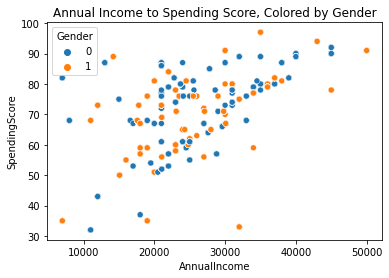

In [144]:
sns.scatterplot(x='AnnualIncome',y= 'SpendingScore', hue='Gender', data=data);
plt.title('Annual Income to Spending Score, Colored by Gender');

<AxesSubplot:>

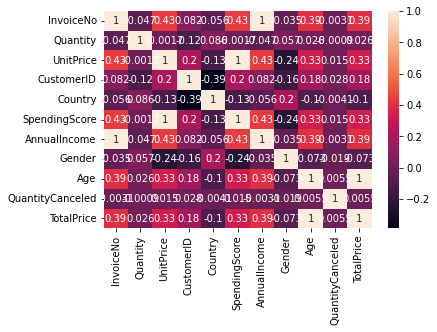

In [106]:
sns.heatmap(datatest_cleaned.corr(), annot=True)

C:\Users\gunat\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning:

All-NaN slice encountered

C:\Users\gunat\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning:

All-NaN slice encountered



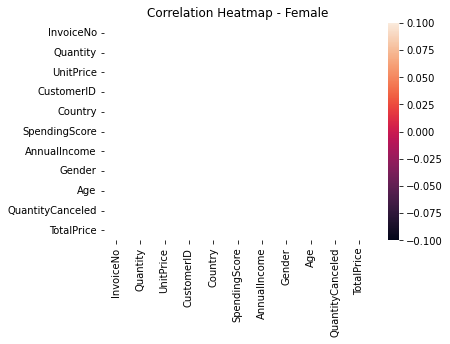

In [107]:
sns.heatmap(female_customers.corr(), annot=True);
plt.title('Correlation Heatmap - Female');

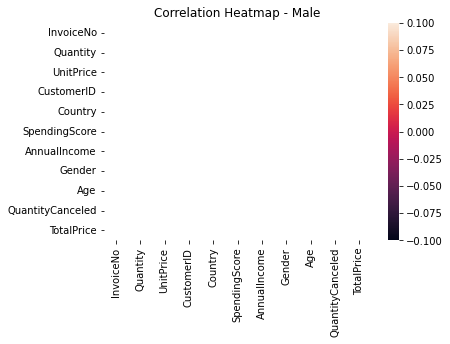

In [97]:
sns.heatmap(male_customers.corr(), annot=True);
plt.title('Correlation Heatmap - Male');

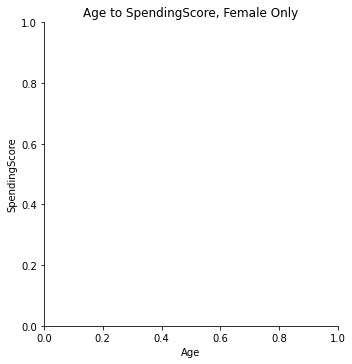

In [98]:
sns.lmplot(x='Age', y='SpendingScore', data=female_customers);
plt.title('Age to SpendingScore, Female Only');

In [142]:
X=data1.drop(["StockCode","Description","InvoiceDate","InvoiceNo","CustomerID"],axis=1)
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=3,
            y=inertia[2],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

In [138]:


from sklearn import datasets
from sklearn.cluster import KMeans
#
# Load IRIS dataset
#
Y=data1.drop(["StockCode","Description","InvoiceDate","InvoiceNo","CustomerID","QuantityCanceled","TotalPrice","Quantity","UnitPrice","Country"],axis=1)
#
# Instantiate the KMeans models
#
km = KMeans(n_clusters=3, random_state=42)
#
# Fit the KMeans model
#
km.fit_predict(X)
#
# Calculate Silhoutte Score
#
score = silhouette_score(X, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.435


In [145]:
kmeans = KMeans(
        n_clusters=5, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=data.drop(["StockCode","Description","InvoiceDate","InvoiceNo","CustomerID"],axis=1).columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig4.show()

In [1]:
#Model2

Y=data1.drop(["StockCode","Description","InvoiceDate","InvoiceNo","CustomerID","QuantityCanceled","TotalPrice","Quantity","UnitPrice","Country"],axis=1)
scaler = MinMaxScaler()
scaler.fit(Y)
Y=scaler.transform(Y)
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(Y)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=3,
            y=inertia[2],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

NameError: name 'data1' is not defined

In [152]:
kmeans = KMeans(
        n_clusters=5, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(Y)
clusters=pd.DataFrame(Y,columns=data.drop(["StockCode","Description","InvoiceDate","InvoiceNo","CustomerID","QuantityCanceled","TotalPrice","Quantity","UnitPrice","Country"],axis=1).columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig5 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig5.show()

In [236]:
pie=clusters.groupby('label').size().reset_index()
pie.columns=['label','value']
px.pie(pie,values='value',names='label',color=['blue','red','green','purpal','orange'])

In [155]:
data3=pd.DataFrame(data)
data3=data.drop(["StockCode","Description","InvoiceDate","InvoiceNo","CustomerID","QuantityCanceled","TotalPrice","Quantity","UnitPrice","Country"], axis = 1)

In [157]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data3)
data_scaled = pd.DataFrame(data_scaled, columns=data3.columns)
data_scaled.head()

,SpendingScore,AnnualIncome,Gender,Age
0,0.002609,0.999995,0.000043,0.001957
1,0.002609,0.999995,0.000043,0.001957
2,0.002609,0.999995,0.000043,0.001957
3,0.002609,0.999995,0.000043,0.001957
4,0.002609,0.999995,0.000043,0.001957


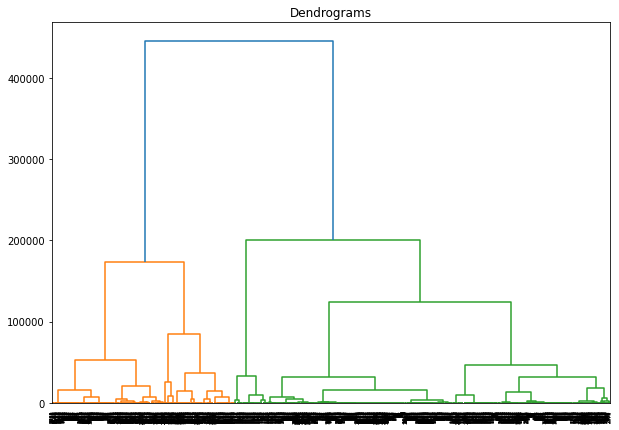

In [159]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data3, method='ward'))

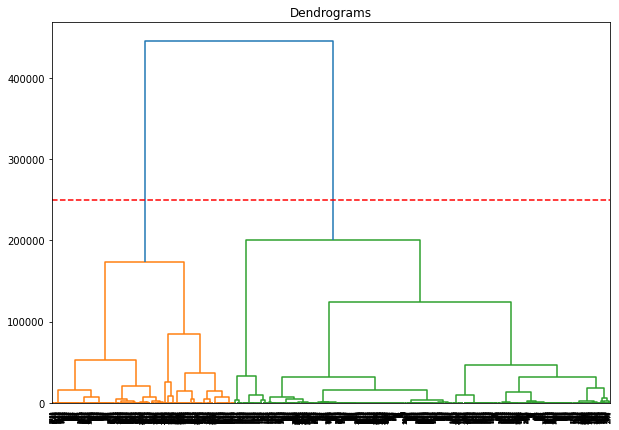

In [161]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data3, method='ward'))
plt.axhline(y=250000, color='r', linestyle='--')

In [163]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data3)

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

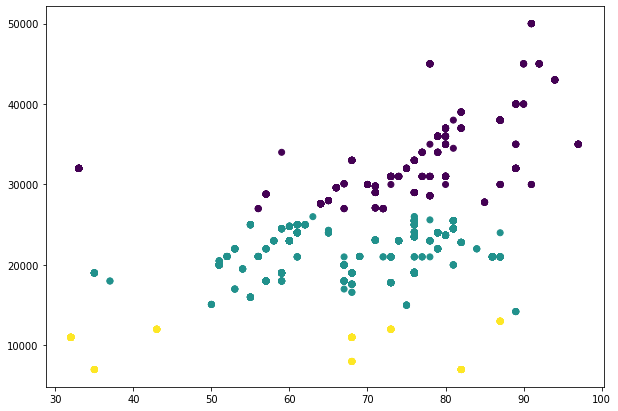

In [164]:
plt.figure(figsize=(10, 7))  
plt.scatter(data1['SpendingScore'], data1['AnnualIncome'], c=cluster.labels_) 

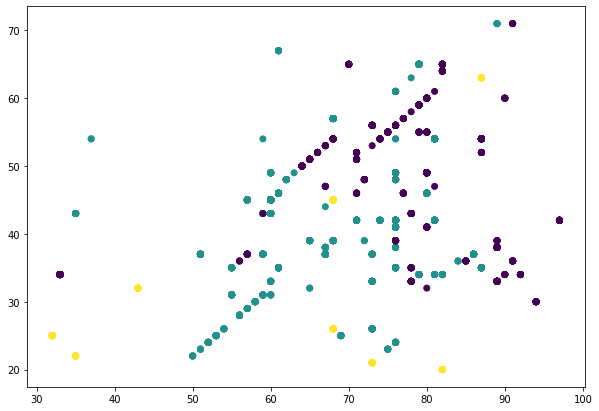

In [165]:
plt.figure(figsize=(10, 7))  
plt.scatter(data1['SpendingScore'], data1['Age'], c=cluster.labels_) 

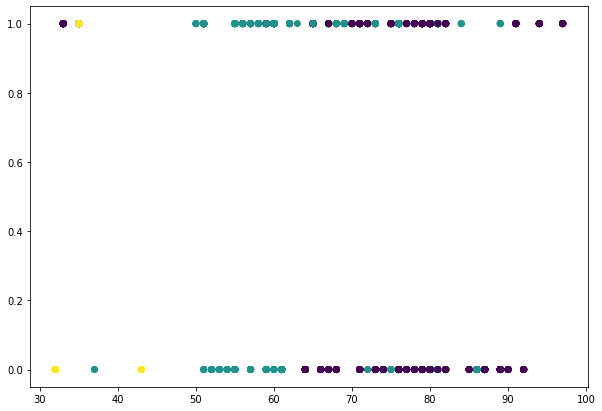

In [166]:
plt.figure(figsize=(10, 7))  
plt.scatter(data3['SpendingScore'], data1['Gender'], c=cluster.labels_)

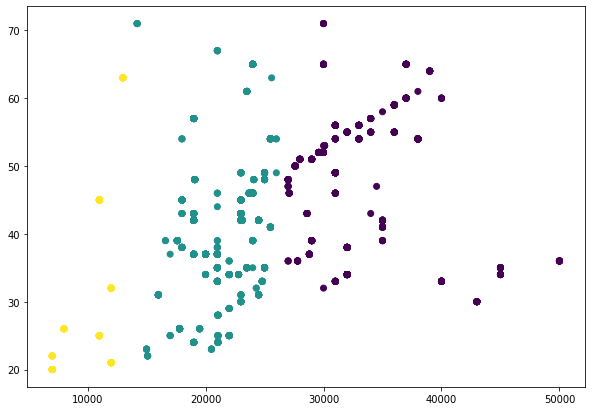

In [167]:
plt.figure(figsize=(10, 7))  
plt.scatter(data1['AnnualIncome'], data1['Age'], c=cluster.labels_) 

In [171]:
import plotly.express as px 
fig = px.scatter_matrix(data,
width=1800, height=1600)
fig.show()

In [174]:
fig1= px.scatter(data3, x="SpendingScore",y="AnnualIncome",color="Gender",size="Age")
fig1.update_layout(title="total")
fig1.show()

In [218]:
datatest.head(300)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SpendingScore,AnnualIncome,Gender,Age
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,60,23000,1,45
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,60,23000,1,45
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,60,23000,1,45
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,60,23000,1,45
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,60,23000,1,45
...,...,...,...,...,...,...,...,...,...,...,...,...
295,536396,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 10:51,4.25,17850.0,United Kingdom,60,23000,1,45
296,536397,35004B,SET OF 3 BLACK FLYING DUCKS,12,12/1/2010 10:51,4.65,17924.0,United Kingdom,57,18000,1,45
297,536397,35004C,SET OF 3 COLOURED FLYING DUCKS,48,12/1/2010 10:51,4.65,17924.0,United Kingdom,57,18000,1,45
298,536398,21980,PACK OF 12 RED RETROSPOT TISSUES,24,12/1/2010 10:52,0.29,13448.0,United Kingdom,76,25000,0,49


In [207]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2851 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InvoiceNo      2851 non-null   object 
 1   StockCode      2851 non-null   object 
 2   Description    2841 non-null   object 
 3   Quantity       2851 non-null   int64  
 4   InvoiceDate    2851 non-null   object 
 5   UnitPrice      2851 non-null   float64
 6   CustomerID     1920 non-null   float64
 7   Country        2851 non-null   object 
 8   SpendingScore  2851 non-null   object 
 9   AnnualIncome   2851 non-null   object 
 10  Gender         2851 non-null   object 
 11  Age            2851 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 354.1+ KB


In [208]:
datatest['CustomerID'].unique()

array([17850., 13047., 12583., 13748., 15100., 15291., 14688., 17809.,
       15311., 14527., 16098., 18074., 17420., 16029., 16250., 12431.,
       17511., 17548., 13705., 13747., 13408., 13767., 17924., 13448.,
       15862., 15513., 12791., 16218., 14045., 14307., 17908., 17920.,
          nan, 12838., 13255., 16583., 18085., 13758., 13694., 15983.,
       14849., 17968., 16210., 17897., 17377., 16552., 17181., 17951.,
       14729., 12748., 15012., 12868., 17572., 14078., 14001., 12662.,
       15525., 14237., 17905., 15485., 12433., 16955., 15350., 15605.,
       18144., 15922., 14594., 15165., 14911., 16456., 17841., 12472.,
       17346., 17643., 17873., 13093., 12921., 13468., 17760., 16928.,
       16048., 16274., 14496., 14696., 16539., 17025., 13777., 17690.,
       12947., 17460., 18229., 14142., 17069., 13065., 14606., 12680.])

In [212]:
li=['17850', '13047', '12583']
df_new = datatest.iloc[np.where(datatest.CustomerID.isin(li))]

In [213]:
df_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SpendingScore,AnnualIncome,Gender,Age


In [220]:
df = pd.DataFrame(datatest,columns =["StockCode","Description","InvoiceDate","InvoiceNo","CustomerID","QuantityCanceled","TotalPrice","Quantity","UnitPrice","Country",'SpendingScore','AnnualIncome','Age','Gender'])
print(df)

       StockCode                          Description      InvoiceDate  \
0         85123A   WHITE HANGING HEART T-LIGHT HOLDER   12/1/2010 8:26   
1          71053                  WHITE METAL LANTERN   12/1/2010 8:26   
2         84406B       CREAM CUPID HEARTS COAT HANGER   12/1/2010 8:26   
3         84029G  KNITTED UNION FLAG HOT WATER BOTTLE   12/1/2010 8:26   
4         84029E       RED WOOLLY HOTTIE WHITE HEART.   12/1/2010 8:26   
...          ...                                  ...              ...   
2846       22897              OVEN MITT APPLES DESIGN  12/1/2010 17:06   
2847       22898        CHILDRENS APRON APPLES DESIGN  12/1/2010 17:06   
2848       22900      SET 2 TEA TOWELS I LOVE LONDON   12/1/2010 17:06   
2849       22904            CALENDAR PAPER CUT DESIGN  12/1/2010 17:06   
541908     22138        BAKING SET 9 PIECE RETROSPOT   12/9/2011 12:50   

       InvoiceNo  CustomerID  QuantityCanceled  TotalPrice  Quantity  \
0         536365     17850.0           

In [221]:
df.to_csv('datatest.csv',index=False)

In [223]:
df1=datatest


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2851 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   StockCode         2851 non-null   object 
 1   Description       2841 non-null   object 
 2   InvoiceDate       2851 non-null   object 
 3   InvoiceNo         2851 non-null   object 
 4   CustomerID        1920 non-null   float64
 5   QuantityCanceled  0 non-null      float64
 6   TotalPrice        0 non-null      float64
 7   Quantity          2851 non-null   int64  
 8   UnitPrice         2851 non-null   float64
 9   Country           2851 non-null   object 
 10  SpendingScore     2851 non-null   object 
 11  AnnualIncome      2851 non-null   object 
 12  Age               2851 non-null   object 
 13  Gender            2851 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 398.6+ KB


In [235]:
df1['Age'] = df.Age.astype(int)
df1['SpendingScore'] = df.SpendingScore.astype(int)
df1['AnnualIncome'] = df.AnnualIncome.astype(int)
df1['Gender'] = df.Gender.astype(int)


df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2851 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InvoiceNo      2851 non-null   object 
 1   StockCode      2851 non-null   object 
 2   Description    2841 non-null   object 
 3   Quantity       2851 non-null   int64  
 4   InvoiceDate    2851 non-null   object 
 5   UnitPrice      2851 non-null   float64
 6   CustomerID     1920 non-null   float64
 7   Country        2851 non-null   object 
 8   SpendingScore  2851 non-null   int32  
 9   AnnualIncome   2851 non-null   int32  
 10  Gender         2851 non-null   int32  
 11  Age            2851 non-null   int32  
dtypes: float64(2), int32(4), int64(1), object(5)
memory usage: 309.5+ KB


In [231]:
df = df.drop(columns=['QuantityCanceled'],axis=1)

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2851 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StockCode      2851 non-null   object 
 1   Description    2841 non-null   object 
 2   InvoiceDate    2851 non-null   object 
 3   InvoiceNo      2851 non-null   object 
 4   CustomerID     1920 non-null   float64
 5   Quantity       2851 non-null   int64  
 6   Country        2851 non-null   object 
 7   SpendingScore  2851 non-null   int32  
 8   AnnualIncome   2851 non-null   int32  
 9   Age            2851 non-null   int32  
 10  Gender         2851 non-null   int32  
dtypes: float64(1), int32(4), int64(1), object(5)
memory usage: 287.3+ KB


In [ ]:
sns.heatmap(datatest_cleaned.corr(), annot=True)